In [1]:
import ROOT as r
import uproot
import hist
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import array as arr
from milliqanProcessor import *

Welcome to JupyROOT 6.28/04


In [2]:
def getMaxPulseTime(events):
    t_0 = events.time_module_calibrated[(events.eventCuts) & (events.layer0) & (events.straightPulses)]
    t_1 = events.time_module_calibrated[(events.eventCuts) & (events.layer1) & (events.straightPulses)]
    t_2 = events.time_module_calibrated[(events.eventCuts) & (events.layer2) & (events.straightPulses)]
    t_3 = events.time_module_calibrated[(events.eventCuts) & (events.layer3) & (events.straightPulses)]

    #example of getting max value mask
    events['max_height'] = events.height == ak.max(events.height, axis=1, keepdims=True)

    passingHeights0 = events.height[(events.eventCuts) & (events.layer0) & (events.straightPulses)]
    passingHeights1 = events.height[(events.eventCuts) & (events.layer1) & (events.straightPulses)]
    passingHeights2 = events.height[(events.eventCuts) & (events.layer2) & (events.straightPulses)]
    passingHeights3 = events.height[(events.eventCuts) & (events.layer3) & (events.straightPulses)]

    #print(len(ak.drop_none(ak.flatten(ak.max(passingHeights0, axis=1, keepdims=True)))), len(ak.drop_none(ak.flatten(ak.max(passingHeights1, axis=1, keepdims=True)))), len(ak.drop_none(ak.flatten(ak.max(passingHeights2, axis=1, keepdims=True)))), len(ak.drop_none(ak.flatten(ak.max(passingHeights3, axis=1, keepdims=True)))))

    max_pulse0 = ak.pad_none(passingHeights0, 1, axis=1) == ak.max(passingHeights0, axis=1, keepdims=True, initial=0)
    max_pulse1 = ak.pad_none(passingHeights1, 1, axis=1) == ak.max(passingHeights1, axis=1, keepdims=True, initial=0)
    max_pulse2 = ak.pad_none(passingHeights2, 1, axis=1) == ak.max(passingHeights2, axis=1, keepdims=True, initial=0)
    max_pulse3 = ak.pad_none(passingHeights3, 1, axis=1) == ak.max(passingHeights3, axis=1, keepdims=True, initial=0)

    #print(ak.pad_none(passingHeights0, 1, axis=1))
    #print(ak.max(passingHeights0, axis=1, keepdims=True, initial=0))

    #print(ak.drop_none(max_pulse0, axis=1))

    t_0 = t_0[ak.drop_none(max_pulse0, axis=1)]
    t_1 = t_1[ak.drop_none(max_pulse1, axis=1)]
    t_2 = t_2[ak.drop_none(max_pulse2, axis=1)]
    t_3 = t_3[ak.drop_none(max_pulse3, axis=1)]

    return t_0, t_1, t_2, t_3

    #np.set_printoptions(threshold=np.inf)

Number of events 404605
Number of passing events 111616


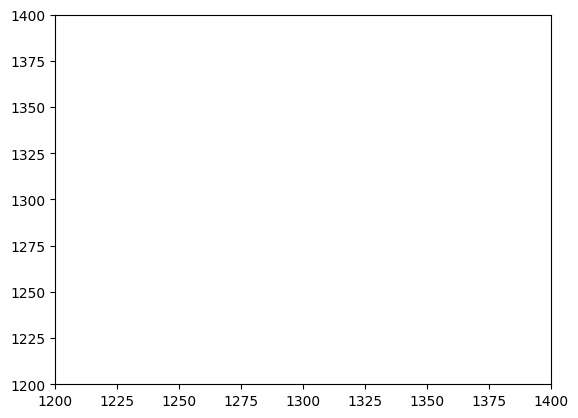

In [3]:
if __name__ == "__main__":

    filelist = ['MilliQan_Run1031_combined.root:t']
    branches = ['boardsMatched', 'time_module_calibrated', 'height', 'area', 'column', 'row', 'layer']

    branchesToMake = ['layerCut', 'fourLayerCut', 'straightLineCut', "combineCuts(['fourLayers', 'straightPath']; 'eventCuts')", 'threeAreaSaturatedInLine(50000)', "combineCuts(['eventCuts', 'three_sat']; 'eventCuts')"]

    myiterator = milliqanProcessor(filelist, branches)
    myiterator.setCustomFunction(getMaxPulseTime)
    myiterator.setBranches(branchesToMake)
    myiterator.run()

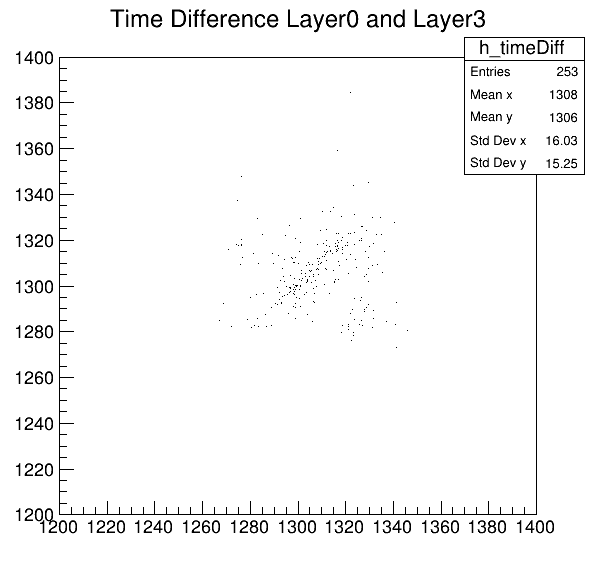

In [4]:
c1 = r.TCanvas("c1", "c1", 600, 600)
c1.cd()
myiterator.h_timeDiff.Draw()
c1.Draw()
